**Google Drive Bağlantısı**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dosyaları Zipten Çıkarma**

In [ ]:
!cd /content
!unzip /content/drive/MyDrive/datasets/datasets.zip

**Kurulumlar**

In [ ]:
!pip install ultralytics
!git clone https://github.com/ultralytics/ultralytics.git
%cd /content/ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 12.5 MB/s eta 0:00:00
Cloning into 'ultralytics'...
remote: Enumerating objects: 18903, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 18903 (delta 46), reused 64 (delta 41), pack-reused 18816
Receiving objects: 100% (18903/18903), 10.22 MiB | 8.22 MiB/s, done.
Resolving deltas: 100% (13231/13231), done.
/content/ultralytics


In [ ]:
!yolo checks
from ultralytics import YOLO
from IPython.display import display, Image
%cd /content/ultralytics

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 51.00 GB
CPU                 Intel Xeon 2.00GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
/content/ultralytics


Wandb


In [ ]:
%pip install -q wandb
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

**Eğitim**

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/bestv10.pt data=custom.yaml epochs=10 imgsz=640 batch=16 optimizer=SGD lr0=0.001 patience=5

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/bestv10.pt, data=custom.yaml, epochs=10, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

**TensorBoard**

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/ultralytics/runs/detect/train

**Test (Eval)**

In [ ]:
!yolo task=detect mode=val model=/content/ultralytics/runs/detect/train/weights/last.pt data=custom.yaml

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68323872 parameters, 0 gradients, 258.5 GFLOPs
val: Scanning /content/ultralytics/datasets/valid/labels.cache... 2530 images, 0 backgrounds, 0 corrupt: 100% 2530/2530 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 159/159 [01:53<00:00,  1.40it/s]
                   all       2530       2624      0.922      0.876      0.918      0.875
AM General Hummer SUV 2000       2530         12      0.975          1      0.995      0.941
Acura Integra Type R 2001       2530          8      0.817      0.875      0.877       0.84
   Acura RL Sedan 2012       2530          7      0.881      0.429      0.539      0.513
   Acura TL Sedan 2012       2530         15      0.738      0.867      0.814      0.748
  Acura TL Type-S 2008       2530          9      0.998          1      0.995      0.995
  Acura TSX Sedan 2012  

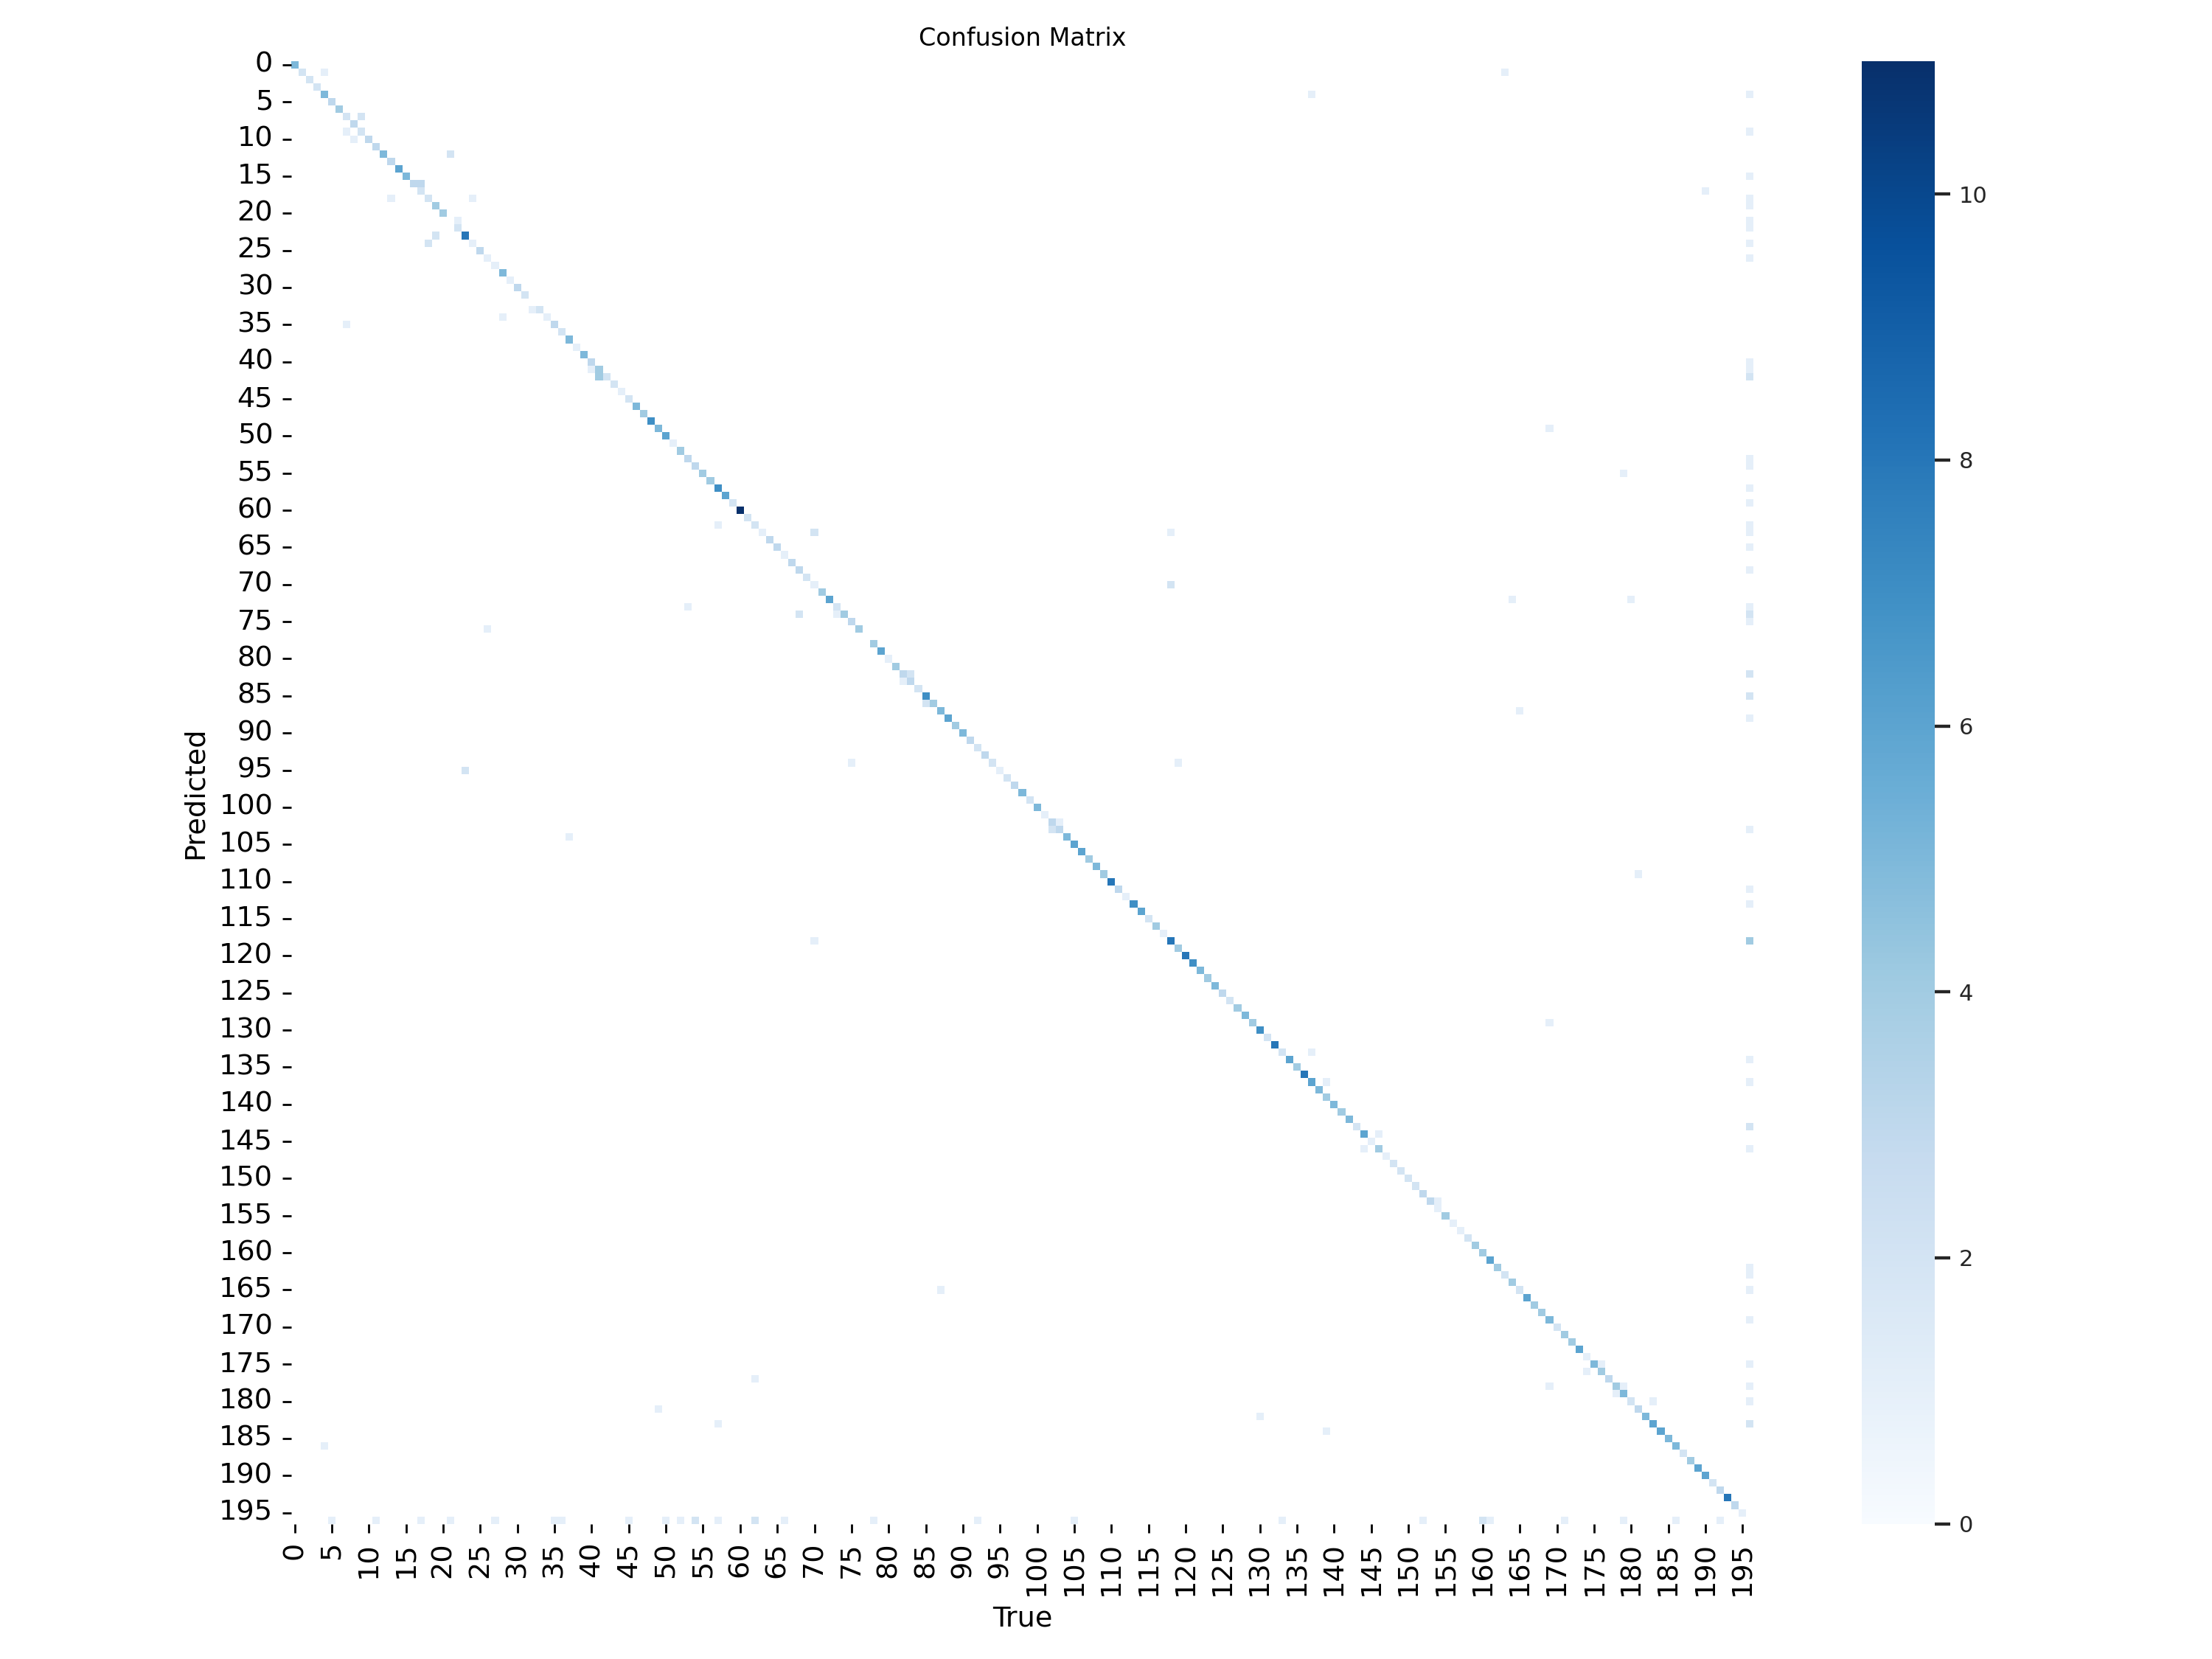

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/ultralytics/runs/detect/train/confusion_matrix.png', width=600)

**Resim Üzerinden Test**


0: 640x640 1 AM General Hummer SUV 2000, 1: 640x640 1 Aston Martin V8 Vantage Convertible 2012, 2: 640x640 1 Volvo C30 Hatchback 2012, 246.4ms
Speed: 2.3ms preprocess, 82.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


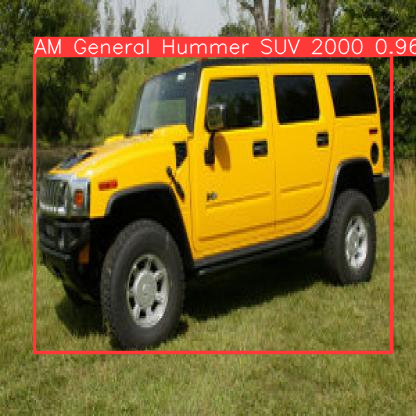

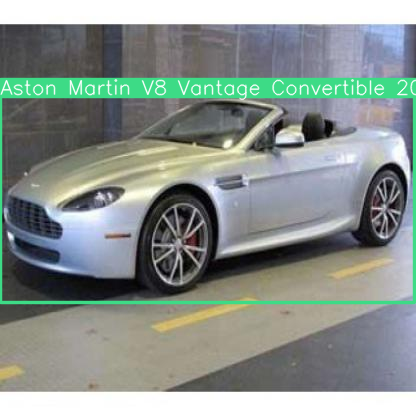

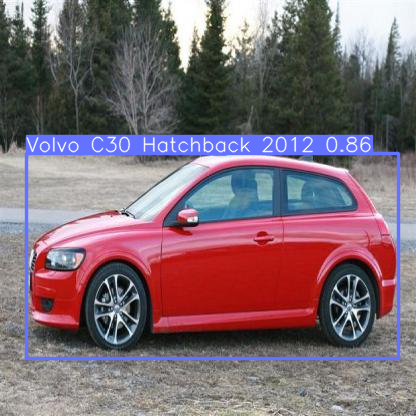

In [ ]:
from ultralytics import YOLO
from PIL import Image
from google.colab.patches import cv2_imshow

model = YOLO('/content/drive/MyDrive/weights/best.pt')

results = model(['/content/1.jpg', '/content/2.jpg', "/content/3.jpg"])

for r in results:
    im_array = r.plot()
    im_array_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2BGRA)
    cv2_imshow(im_array_rgb)

In [ ]:
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Başlıksız.png

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /content/drive/MyDrive/Başlıksız.png: 384x640 3 vehicles, 68.6ms
Speed: 2.2ms preprocess, 68.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


**Video Üzerinden Test**

In [ ]:
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/traffic.mp4